In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('samp_online.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0.00,0,0
1,1,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0.00,1,0
2,1,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0.00,1,0
3,1,DEBIT,5337.77,C712410124,41720,36382.23,C195600860,41898,40348.79,0,0
4,1,CASH_OUT,229133.94,C905080434,15325,0.00,C476402209,5083,51513.44,0,0


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5 non-null      int64  
 1   type            5 non-null      object 
 2   amount          5 non-null      float64
 3   nameOrig        5 non-null      object 
 4   oldbalanceOrg   5 non-null      int64  
 5   newbalanceOrig  5 non-null      float64
 6   nameDest        5 non-null      object 
 7   oldbalanceDest  5 non-null      int64  
 8   newbalanceDest  5 non-null      float64
 9   isFraud         5 non-null      int64  
 10  isFlaggedFraud  5 non-null      int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 572.0+ bytes


In [14]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0.0,0,0


In [15]:

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,1.0,48934.670000,45508.600000,39335.718000,13632.600000,18372.446000,0.400000,0.0
std,0.0,100815.088957,71705.255514,69429.993764,18032.730681,25465.297441,0.547723,0.0
min,1.0,181.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,181.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.0,5337.770000,15325.000000,0.000000,5083.000000,0.000000,0.000000,0.0
75%,1.0,9839.640000,41720.000000,36382.230000,21182.000000,40348.790000,1.000000,0.0
max,1.0,229133.940000,170136.000000,160296.360000,41898.000000,51513.440000,1.000000,0.0


# DATA VISUALIZATION



In [16]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 5
Float variables: 3


<Axes: xlabel='type', ylabel='count'>

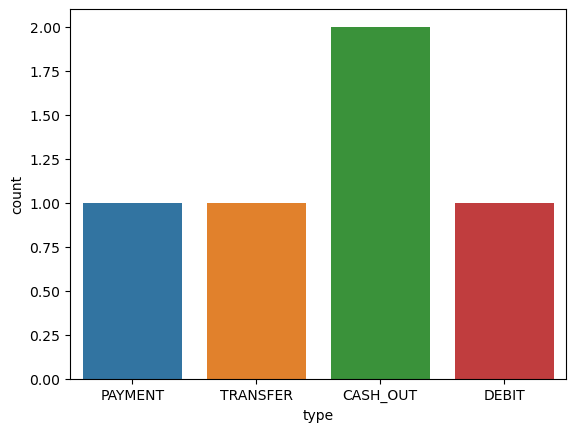

In [17]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

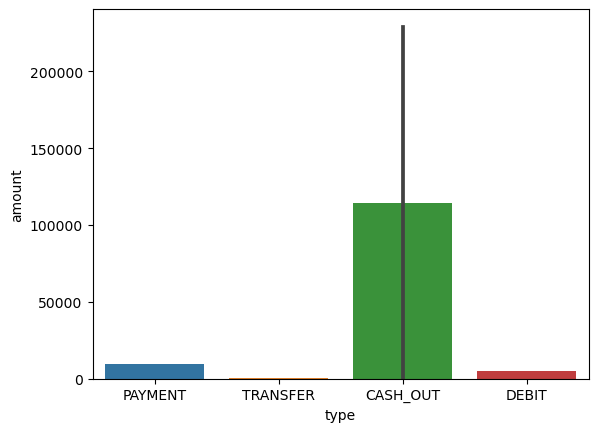

In [18]:
sns.barplot(x='type', y='amount', data=data)


In [19]:
data['isFraud'].value_counts()


isFraud
0    3
1    2
Name: count, dtype: int64

/var/folders/gz/r9tk7xc50vb8dd2z5f06t3d40000gn/T/ipykernel_1221/2319969707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_

<Axes: xlabel='step', ylabel='Density'>

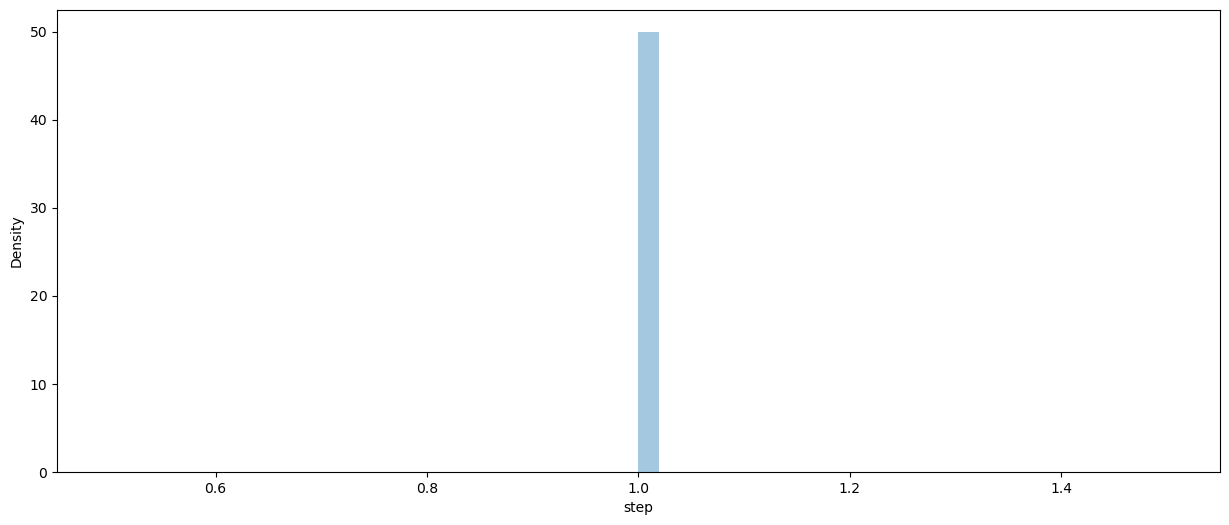

In [22]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


# DATA PREPROCESSING


In [26]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0.00,0,0,False,True,False
1,1,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0.00,1,0,False,False,True
2,1,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0.00,1,0,False,False,False
3,1,DEBIT,5337.77,C712410124,41720,36382.23,C195600860,41898,40348.79,0,0,True,False,False
4,1,CASH_OUT,229133.94,C905080434,15325,0.00,C476402209,5083,51513.44,0,0,False,False,False


In [27]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [28]:
X.shape, y.shape


((5, 10), (5,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


ModuleNotFoundError: No module named 'xgboost'